In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds
import matplotlib.ticker as mticker

In [2]:
train_data, info = tfds.load("fashion_mnist", split="train", with_info=True)
test_data = tfds.load("fashion_mnist", split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete35JZKX/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete35JZKX/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
class_names = ["T-shirt/top","Trouser/pants","pullover shirt","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

In [4]:
def format_image(data):
  image = data["image"]
  image = tf.reshape(image, [-1])
  image = tf.cast(image, 'float32')
  image = image / 255.0
  return image, data["label"]

In [5]:
train_data = train_data.map(format_image)
test_data = test_data.map(format_image)

In [6]:
batch_size = 64
train = train_data.shuffle(buffer_size=1024).batch(batch_size)

test = test_data.batch(batch_size)

In [8]:
train

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int64)>

In [7]:
#define model

def base_model():
  inputs = tf.keras.Input(shape=((784,)), name='digits')
  x = tf.keras.layers.Co
  x = tf.keras.layers.Dense(64, activation="relu", name='dense_1')(inputs)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(64, activation="relu", name='dense_2')(x)
  outputs = tf.keras.layers.Dense(10, activation="softmax", name='prediction')(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [8]:
optimizer = tf.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()


In [9]:
#metrics
train_acc_metrics = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metrics = tf.keras.metrics.SparseCategoricalAccuracy()

In [10]:
#training loop

def apply_gradient(optimizer, model, x,y):
  with tf.GradientTape() as tape:
    logits = model(x)
    loss_value = loss_object(y_true=y, y_pred=logits)

  grads = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(grads,model.trainable_weights))

  return logits, loss_value

In [11]:
def train_one_epoch():
  losses = []
  pbar = tqdm(total=len(list(enumerate(train))), position=0, leave=True, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} ')
  for step, (x_batch_train,y_batch_train) in enumerate(train):
    logits, loss_value = apply_gradient(optimizer, model, x_batch_train,y_batch_train)

    losses.append(loss_value)

    train_acc_metrics(y_batch_train, logits)
    pbar.set_description(f"Training loss for step {step}: {loss_value} ")
    pbar.update()

  return losses


In [12]:
def perform_validation():
  losses = []
  for x_val, y_val in test:
    val_logits = model(x_val)
    val_loss = loss_object(y_val,val_logits)
    losses.append(val_loss)
    val_acc_metrics(y_val,val_logits)
  return losses


In [13]:
model = None
model = base_model()

epochs = range(10)
epochs_val_loss, epochs_train_losses = [],[]

for epoch in epochs:
  print("Epoch : ",epoch)
  
  losses_train = train_one_epoch()
  train_acc = train_acc_metrics.result()

  losses_val = perform_validation()
  val_acc = val_acc_metrics.result()


  losses_train_mean = np.mean(losses_train)
  losses_val_mean = np.mean(losses_val)

  epochs_val_loss.append(losses_val_mean)
  epochs_train_losses.append(losses_train_mean)

  print(f"Epoch : {epoch} , Train loss : {float(losses_train_mean)} , Val loss : {float(losses_val_mean)} , train accuracy : {train_acc} , val acc : {val_acc}" )
  train_acc_metrics.reset_states()
  val_acc_metrics.reset_states()





Epoch :  0


Training loss for step 937: 0.5855875611305237 : 100%|██████████| 938/938 


Epoch : 0 , Train loss : 0.5414645075798035 , Val loss : 0.4318554997444153 , train accuracy : 0.8095999956130981 , val acc : 0.8492000102996826
Epoch :  1


Training loss for step 937: 0.17341072857379913 : 100%|██████████| 938/938 


Epoch : 1 , Train loss : 0.38811227679252625 , Val loss : 0.4200451672077179 , train accuracy : 0.861299991607666 , val acc : 0.8495000004768372
Epoch :  2


Training loss for step 937: 0.31216341257095337 : 100%|██████████| 938/938 


Epoch : 2 , Train loss : 0.35166510939598083 , Val loss : 0.3762963116168976 , train accuracy : 0.8725333213806152 , val acc : 0.8666999936103821
Epoch :  3


Training loss for step 937: 0.33031976222991943 : 100%|██████████| 938/938 


Epoch : 3 , Train loss : 0.3260456919670105 , Val loss : 0.37425172328948975 , train accuracy : 0.8807500004768372 , val acc : 0.866100013256073
Epoch :  4


Training loss for step 937: 0.34946805238723755 : 100%|██████████| 938/938 


Epoch : 4 , Train loss : 0.30958130955696106 , Val loss : 0.386376291513443 , train accuracy : 0.8871333599090576 , val acc : 0.8644999861717224
Epoch :  5


Training loss for step 937: 0.21045084297657013 : 100%|██████████| 938/938 


Epoch : 5 , Train loss : 0.2961207926273346 , Val loss : 0.3773779273033142 , train accuracy : 0.8903999924659729 , val acc : 0.8722000122070312
Epoch :  6


Training loss for step 937: 0.4186818599700928 : 100%|██████████| 938/938 


Epoch : 6 , Train loss : 0.2836657762527466 , Val loss : 0.34843161702156067 , train accuracy : 0.8954499959945679 , val acc : 0.8747000098228455
Epoch :  7


Training loss for step 937: 0.28161272406578064 : 100%|██████████| 938/938 


Epoch : 7 , Train loss : 0.2715259790420532 , Val loss : 0.3412415087223053 , train accuracy : 0.8993833065032959 , val acc : 0.8805999755859375
Epoch :  8


Training loss for step 937: 0.16454735398292542 : 100%|██████████| 938/938 


Epoch : 8 , Train loss : 0.26176929473876953 , Val loss : 0.35337916016578674 , train accuracy : 0.902400016784668 , val acc : 0.8765000104904175
Epoch :  9


Training loss for step 937: 0.2658935785293579 : 100%|██████████| 938/938 


Epoch : 9 , Train loss : 0.2571153938770294 , Val loss : 0.34934937953948975 , train accuracy : 0.90420001745224 , val acc : 0.8784999847412109


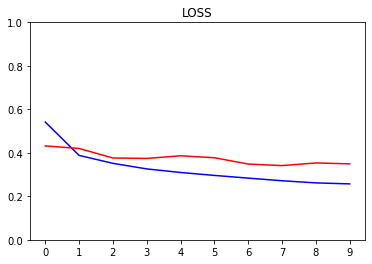

In [14]:
# evaluate model
def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.plot(train_metric, color="blue", label=metric_name)
  plt.plot(val_metric, color="red", label= "val_" + metric_name)

plot_metrics(epochs_train_losses,epochs_val_loss,"LOSS","LOSS",ylim=1.0)



In [15]:
# utility to display a row of images with their predictions and true labels
def display_images(image, predictions, labels, title, n):

  display_strings = [str(i) + "\n\n" + str(j) for i, j in zip(predictions, labels)] 

  plt.figure(figsize=(17,3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], display_strings)
  plt.grid(None)
  image = np.reshape(image, [n, 28, 28])
  image = np.swapaxes(image, 0, 1)
  image = np.reshape(image, [28, 28*n])
  plt.imshow(image)

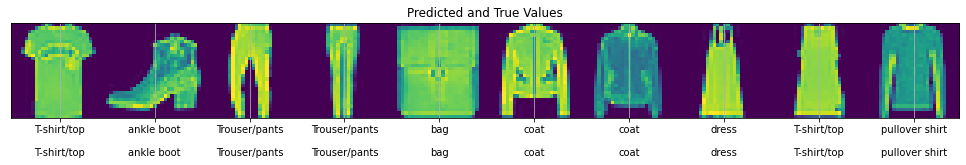

In [16]:
test_inputs = test_data.batch(batch_size=1000001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
  y_pred = model(x)
  y_pred_batches = y_pred.numpy()
  y_true_batches = y.numpy()
  x_batches = x.numpy()

indexes = np.random.choice(len(y_pred_batches), size=10)
images_to_plot = x_batches[indexes]
y_pred_to_plot = y_pred_batches[indexes]
y_true_to_plot = y_true_batches[indexes]

y_pred_labels = [class_names[np.argmax(sel_y_pred)] for sel_y_pred in y_pred_to_plot]
y_true_labels = [class_names[sel_y_true] for sel_y_true in y_true_to_plot]
display_images(images_to_plot, y_pred_labels, y_true_labels, "Predicted and True Values", 10)